In [ ]:
import pandas as pd
import numpy as np
import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def open_files(files):
    list_df=[]
    for filename in files:

        data_file = os.path.join(root, filename)


        dfs = pd.read_csv(data_file, sep=',', header=None, encoding='utf-8', 
                          names=final_columns)
        dfs['date'] = dfs.date
        dfs['id'] = filename

        list_df.append(dfs)


    dfs = pd.concat(list_df)
    dfs = dfs.drop(dfs[dfs.date=='date'].index).reset_index(drop=True)
    del dfs['comments']
    return dfs

In [ ]:
root = '/content/drive/My Drive/Colab Notebooks/glucose/D1NAMO_glucose'

files = [f for f in os.listdir(root) if f.endswith(".csv")]

final_columns=['date', 'time', 'glucose', 'id','comments']

In [ ]:
dfs = open_files(files)

In [ ]:
dfs.head()

,date,time,glucose,id
0,2014-10-01,09:00:00,5.4,glucose_07.csv
1,2014-10-01,11:49:59,3.8,glucose_07.csv
2,2014-10-01,11:54:59,4,glucose_07.csv
3,2014-10-01,11:59:59,4.2,glucose_07.csv
4,2014-10-01,12:00:00,5.4,glucose_07.csv


In [ ]:
dfs.shape

(8221, 4)

In [ ]:
dfc = pd.read_csv('/content/drive/My Drive/Colab Notebooks/glucose/all.csv', low_memory=False)
dfc['id'] = dfc['id'].astype('string')
dfc['datetime'] = pd.to_datetime(dfc['datetime'])

In [ ]:
dfc.head(), dfc.shape

(   glucose              id                  datetime
 0  97.2972  glucose_07.csv 2014-10-01 09:00:00+00:00
 1  68.4684  glucose_07.csv 2014-10-01 11:49:59+00:00
 2  72.0720  glucose_07.csv 2014-10-01 11:54:59+00:00
 3  75.6756  glucose_07.csv 2014-10-01 11:59:59+00:00
 4  97.2972  glucose_07.csv 2014-10-01 12:00:00+00:00, (16775314, 3))

In [ ]:
dfs['glucose'] = dfs['glucose'].astype(float)*18.018
datetime = dfs.date + ' ' + dfs.time
dfs['datetime'] = pd.to_datetime(datetime, format= '%Y/%m/%d %H:%M:%S', yearfirst=True)

In [ ]:
dfs.head()

,date,time,glucose,id,datetime
0,2014-10-01,09:00:00,97.2972,glucose_07.csv,2014-10-01 09:00:00
1,2014-10-01,11:49:59,68.4684,glucose_07.csv,2014-10-01 11:49:59
2,2014-10-01,11:54:59,72.0720,glucose_07.csv,2014-10-01 11:54:59
3,2014-10-01,11:59:59,75.6756,glucose_07.csv,2014-10-01 11:59:59
4,2014-10-01,12:00:00,97.2972,glucose_07.csv,2014-10-01 12:00:00


In [ ]:
#Saber las hypoglycemias que hay

dfs['hypoglycemia'] = np.where(dfs['glucose'] < 70, 1, 0)

In [ ]:
dfc['hypoglycemia'] = np.where(dfc['glucose'] < 70, 1, 0)
dfc.head()

,glucose,id,datetime,hypoglycemia
0,97.2972,glucose_07.csv,2014-10-01 09:00:00+00:00,0
1,68.4684,glucose_07.csv,2014-10-01 11:49:59+00:00,1
2,72.0720,glucose_07.csv,2014-10-01 11:54:59+00:00,0
3,75.6756,glucose_07.csv,2014-10-01 11:59:59+00:00,0
4,97.2972,glucose_07.csv,2014-10-01 12:00:00+00:00,0


In [ ]:
dfs.head()

,date,time,glucose,id,datetime,hypoglycemia
0,2014-10-01,09:00:00,97.2972,glucose_07.csv,2014-10-01 09:00:00,0
1,2014-10-01,11:49:59,68.4684,glucose_07.csv,2014-10-01 11:49:59,1
2,2014-10-01,11:54:59,72.0720,glucose_07.csv,2014-10-01 11:54:59,0
3,2014-10-01,11:59:59,75.6756,glucose_07.csv,2014-10-01 11:59:59,0
4,2014-10-01,12:00:00,97.2972,glucose_07.csv,2014-10-01 12:00:00,0


In [ ]:
conditions = [
    (dfs['glucose'] <= 70) & (dfs['glucose'] > 54),
    (dfs['glucose'] <= 54) & (dfs['glucose'] > 40),
    (dfs['glucose'] <= 40)]

choices = ['mild', 'moderate', 'severe']
dfs['hypoglycemia'] = np.select(conditions, choices, default='correct')

In [ ]:
dfs.head()

,date,time,glucose,id,datetime,hypoglycemia
0,2014-10-01,09:00:00,97.2972,glucose_07.csv,2014-10-01 09:00:00,correct
1,2014-10-01,11:49:59,68.4684,glucose_07.csv,2014-10-01 11:49:59,mild
2,2014-10-01,11:54:59,72.0720,glucose_07.csv,2014-10-01 11:54:59,correct
3,2014-10-01,11:59:59,75.6756,glucose_07.csv,2014-10-01 11:59:59,correct
4,2014-10-01,12:00:00,97.2972,glucose_07.csv,2014-10-01 12:00:00,correct


In [ ]:
c = dfs.groupby(dfs['hypoglycemia']).count()["glucose"]

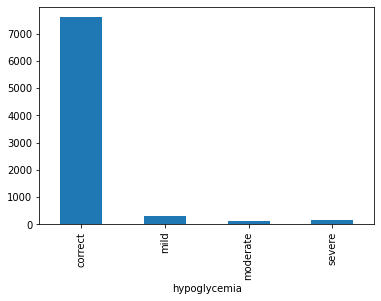

In [ ]:
#Ver cuantas hypoglycemias hay y tipos en comparación con valores correctos de glucosa
dfs.groupby(dfs['hypoglycemia']).count()["glucose"].plot(kind='bar')

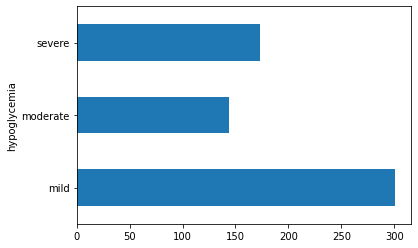

In [ ]:
hg = dfs[dfs['glucose'] < 70]
hg.groupby(hg['hypoglycemia']).count()["glucose"].plot(kind='barh')

In [ ]:
#Porcentaje
a = dfs.groupby(dfs['hypoglycemia'])['glucose'].count()
100 * a / len(dfs)

hypoglycemia
correct     92.482666
mild         3.661355
moderate     1.751612
severe       2.104367
Name: glucose, dtype: float64

In [ ]:
conditions = [
    (dfc['glucose'] <= 70) & (dfc['glucose'] > 54),
    (dfc['glucose'] <= 54) & (dfc['glucose'] > 40),
    (dfc['glucose'] <= 40)]

choices = ['mild', 'moderate', 'severe']
dfc['hypoglycemia'] = np.select(conditions, choices, default='correct')

In [ ]:
c = dfc.groupby(dfc['hypoglycemia']).count()["glucose"]

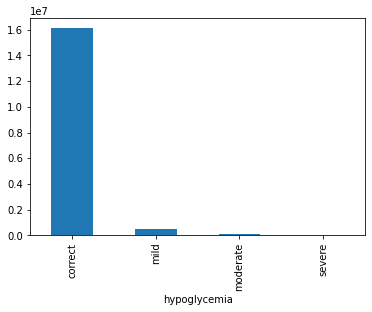

In [ ]:
#Ver cuantas hypoglycemias hay y tipos en comparación con valores correctos de glucosa
dfc.groupby(dfc['hypoglycemia']).count()["glucose"].plot(kind='bar')

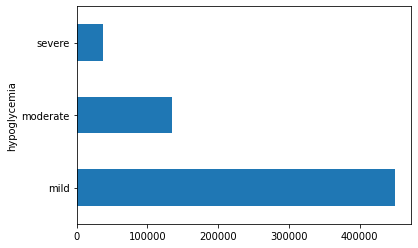

In [ ]:
hgc = dfc[dfc['glucose'] < 70]
hgc.groupby(hgc['hypoglycemia']).count()["glucose"].plot(kind='barh')

In [ ]:
#Porcentaje
ac = dfc.groupby(dfc['hypoglycemia'])['glucose'].count()
100 * ac / len(dfc)

hypoglycemia
correct     96.010060
mild         2.959796
moderate     0.805052
severe       0.225093
Name: glucose, dtype: float64

In [ ]:
#Classification of hypoglycemia
table1 = pd.DataFrame({"Level": ["Glucose alert value (level 1))", "Moderate hypoglycemia (level 2)", "Severe hypoglycemia (level 3)"],
                       "Glycemia criteria" : ["< 70 mg/dl", "< 54 mg/dl", "< 40 mg/dl"],
                       "Description": ["Sufficiently low for treatment with fast-acting carbohydrate and dose adjustment of glucose-lowering therapy",
                                       "Sufficiently low to indicate serious, clinically important hypoglycemia",
                                       "Hypoglycemia associated with severe cognitive impairment requiring external assistant for recovery"]})

table1.head()

,Level,Glycemia criteria,Description
0,Glucose alert value (level 1)),< 70 mg/dl,Sufficiently low for treatment with fast-actin...
1,Moderate hypoglycemia (level 2),< 54 mg/dl,"Sufficiently low to indicate serious, clinical..."
2,Severe hypoglycemia (level 3),< 40 mg/dl,Hypoglycemia associated with severe cognitive ...


In [ ]:
print(table1.to_csv(sep='\t', index=False))

Level	Glycemia criteria	Description
Glucose alert value (level 1))	< 70 mg/dl	Sufficiently low for treatment with fast-acting carbohydrate and dose adjustment of glucose-lowering therapy
Moderate hypoglycemia (level 2)	< 54 mg/dl	Sufficiently low to indicate serious, clinically important hypoglycemia
Severe hypoglycemia (level 3)	< 40 mg/dl	Hypoglycemia associated with severe cognitive impairment requiring external assistant for recovery



In [ ]:
table1.to_dict(orient='list')

{'Description': ['Sufficiently low for treatment with fast-acting carbohydrate and dose adjustment of glucose-lowering therapy',
  'Sufficiently low to indicate serious, clinically important hypoglycemia',
  'Hypoglycemia associated with severe cognitive impairment requiring external assistant for recovery'],
 'Glycemia criteria': ['< 70 mg/dl', '< 54 mg/dl', '< 40 mg/dl'],
 'Level': ['Glucose alert value (level 1))',
  'Moderate hypoglycemia (level 2)',
  'Severe hypoglycemia (level 3)']}

In [ ]:
from tabulate import tabulate

def pprint_df(dframe):
    print(tabulate(dframe, headers='keys', tablefmt='psql', showindex=False))

pprint_df(table1)

+---------------------------------+---------------------+--------------------------------------------------------------------------------------------------------------+
| Level                           | Glycemia criteria   | Description                                                                                                  |
|---------------------------------+---------------------+--------------------------------------------------------------------------------------------------------------|
| Glucose alert value (level 1))  | < 70 mg/dl          | Sufficiently low for treatment with fast-acting carbohydrate and dose adjustment of glucose-lowering therapy |
| Moderate hypoglycemia (level 2) | < 54 mg/dl          | Sufficiently low to indicate serious, clinically important hypoglycemia                                      |
| Severe hypoglycemia (level 3)   | < 40 mg/dl          | Hypoglycemia associated with severe cognitive impairment requiring external assistant for recover

In [ ]:
#Dividir el dataframe por valor de id y saber cuantos datos tiene
patients = []
for i in dfs['id'].unique():
  x = dfs[dfs['id'] == i]
  print("For patient %s the df has shape %s" %(i, x.shape))
  patients.append(x)



For patient glucose_07.csv the df has shape (1011, 6)
For patient glucose_06.csv the df has shape (1298, 6)
For patient glucose_05.csv the df has shape (928, 6)
For patient glucose_01.csv the df has shape (1438, 6)
For patient glucose_04.csv the df has shape (984, 6)
For patient glucose_08.csv the df has shape (1175, 6)
For patient glucose_02.csv the df has shape (1071, 6)
For patient glucose_03.csv the df has shape (185, 6)
For patient glucose_09.csv the df has shape (131, 6)


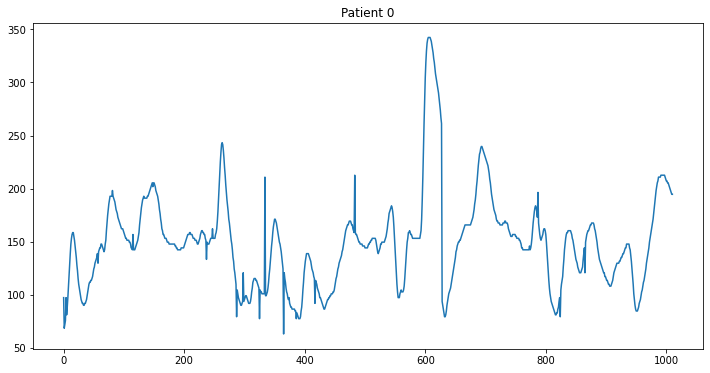

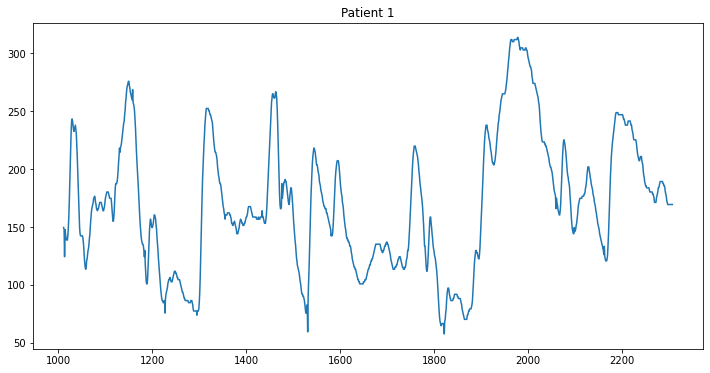

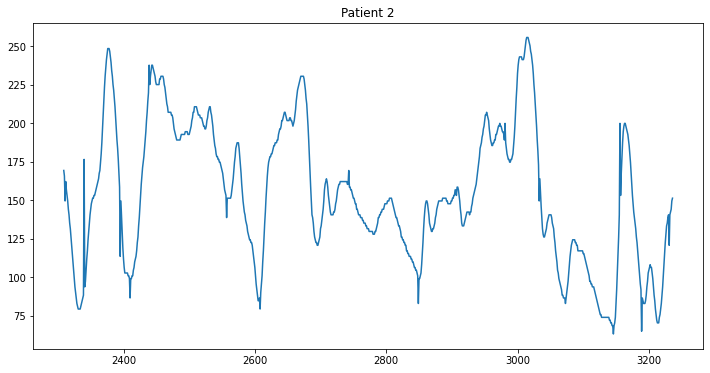

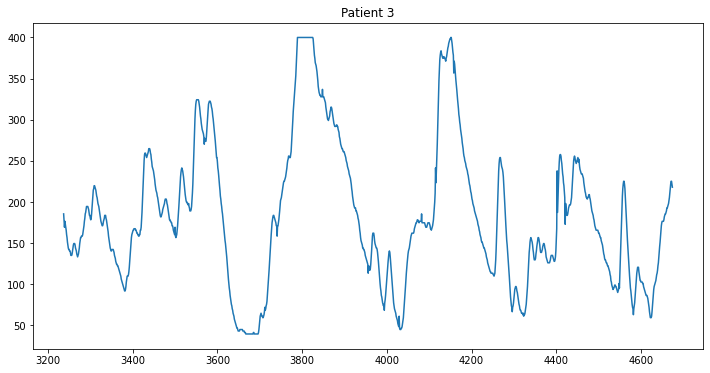

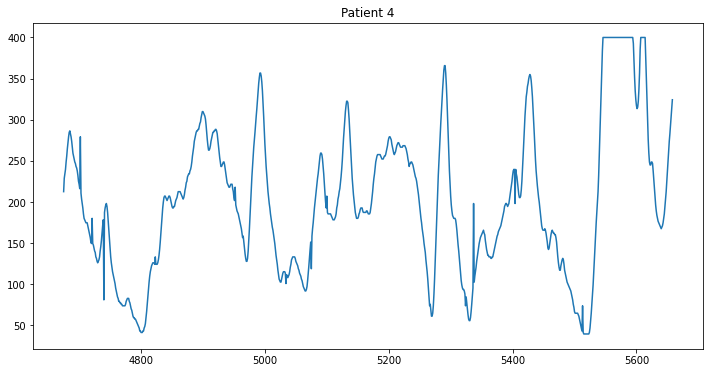

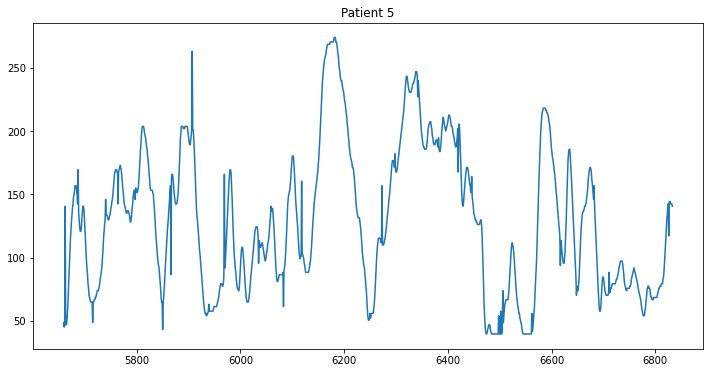

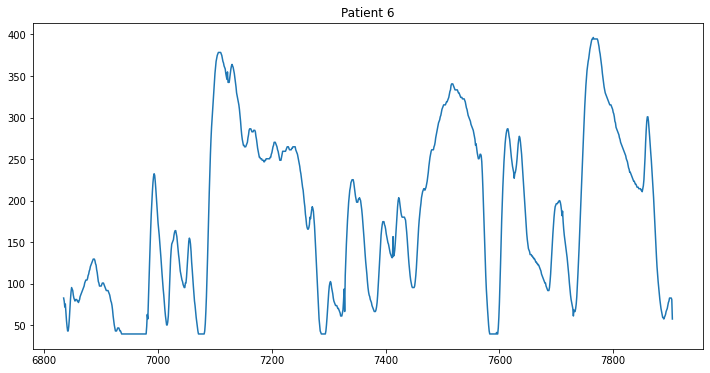

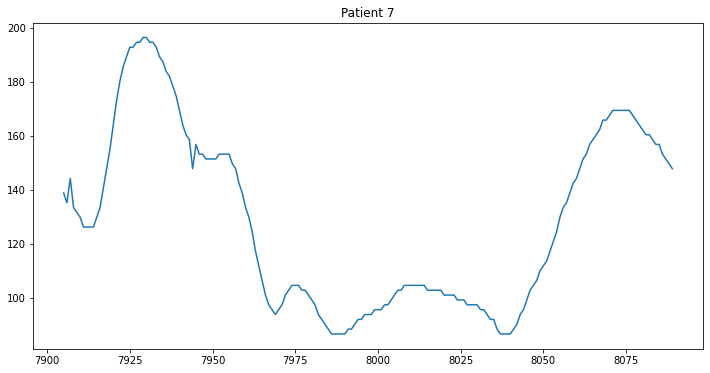

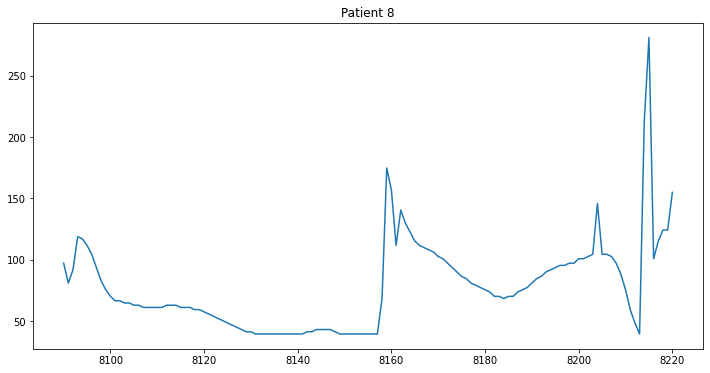

In [ ]:
for i in range(9):
  plt.figure(figsize=(12, 6))
  plt.plot(patients[i].glucose)
  plt.title(f'Patient {i}')

In [ ]:
patients[i].date.unique()

array(['2014-10-01', '2014-10-02', '2014-10-03', '2014-10-04',
       '2014-10-05'], dtype=object)

In [ ]:
dfs.head()

,date,time,glucose,id,datetime,hypoglycemia
0,2014-10-01,09:00:00,97.2972,glucose_07.csv,2014-10-01 09:00:00,correct
1,2014-10-01,11:49:59,68.4684,glucose_07.csv,2014-10-01 11:49:59,mild
2,2014-10-01,11:54:59,72.0720,glucose_07.csv,2014-10-01 11:54:59,correct
3,2014-10-01,11:59:59,75.6756,glucose_07.csv,2014-10-01 11:59:59,correct
4,2014-10-01,12:00:00,97.2972,glucose_07.csv,2014-10-01 12:00:00,correct


In [ ]:
dfs.date.unique()

array(['2014-10-01', '2014-10-02', '2014-10-03', '2014-10-04',
       '2014-10-05', '2014-10-06', '2014-09-30'], dtype=object)

In [ ]:
a = dfs.copy()

for date in a['date'].unique():

    # Select data for the year
    b = a[a.date == year]


,date,time,glucose,id,datetime,hypoglycemia


In [ ]:
patientsc = []
for i in dfc['id'].unique():
  x = dfc[dfc['id'] == i]
  print("For patient %s the df has shape %s" %(i, x.shape))
  patientsc.append(x)

For patient glucose_07.csv the df has shape (1011, 4)
For patient glucose_06.csv the df has shape (1298, 4)
For patient glucose_05.csv the df has shape (928, 4)
For patient glucose_01.csv the df has shape (1438, 4)
For patient glucose_04.csv the df has shape (984, 4)
For patient glucose_08.csv the df has shape (1175, 4)
For patient glucose_02.csv the df has shape (1071, 4)
For patient glucose_03.csv the df has shape (185, 4)
For patient glucose_09.csv the df has shape (131, 4)
For patient patient5_measurements_5minutes_sample.csv the df has shape (78812, 4)
For patient patient1_measurements_15minutes_sample.csv the df has shape (20129, 4)
For patient patient0_measurements_15minutes_sample.csv the df has shape (93657, 4)
For patient patient2_measurements_15minutes_sample.csv the df has shape (12030, 4)
For patient patient3_measurements_5minutes_sample.csv the df has shape (107142, 4)
For patient patient4_measurements_5minutes_sample.csv the df has shape (19798, 4)
For patient patient6_m

In [ ]:
patientsc[0]

,glucose,id,datetime,hypoglycemia
0,97.2972,glucose_07.csv,2014-10-01 09:00:00+00:00,correct
1,68.4684,glucose_07.csv,2014-10-01 11:49:59+00:00,mild
2,72.0720,glucose_07.csv,2014-10-01 11:54:59+00:00,correct
3,75.6756,glucose_07.csv,2014-10-01 11:59:59+00:00,correct
4,97.2972,glucose_07.csv,2014-10-01 12:00:00+00:00,correct
...,...,...,...,...
1006,199.9998,glucose_07.csv,2014-10-05 03:20:01+00:00,correct
1007,198.1980,glucose_07.csv,2014-10-05 03:25:01+00:00,correct
1008,196.3962,glucose_07.csv,2014-10-05 03:30:01+00:00,correct
1009,194.5944,glucose_07.csv,2014-10-05 03:35:01+00:00,correct


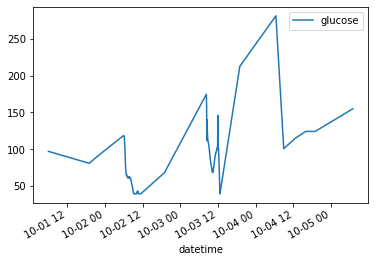

In [ ]:
patientsc[i].set_index('datetime').plot()

<Figure size 864x432 with 0 Axes>

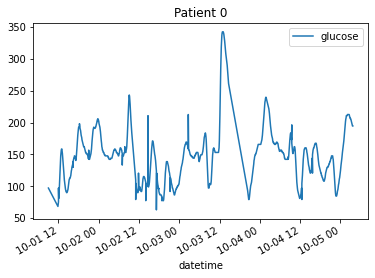

<Figure size 864x432 with 0 Axes>

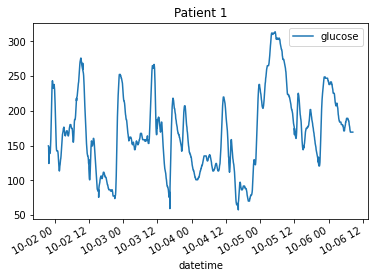

<Figure size 864x432 with 0 Axes>

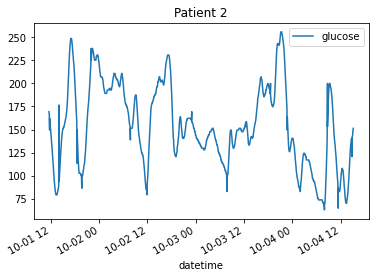

<Figure size 864x432 with 0 Axes>

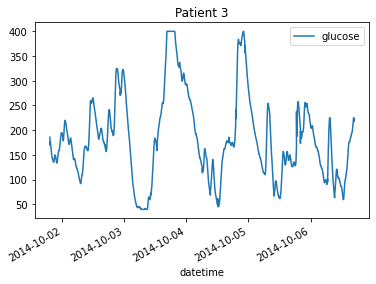

<Figure size 864x432 with 0 Axes>

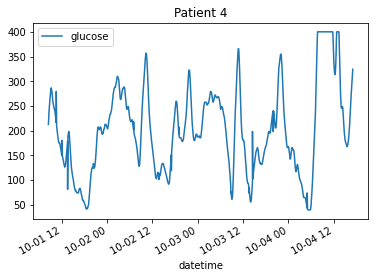

<Figure size 864x432 with 0 Axes>

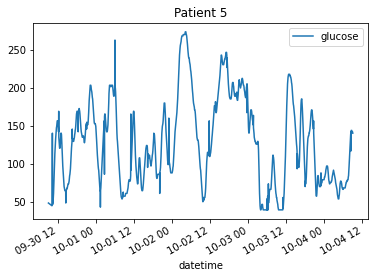

<Figure size 864x432 with 0 Axes>

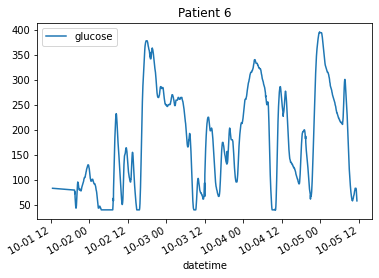

<Figure size 864x432 with 0 Axes>

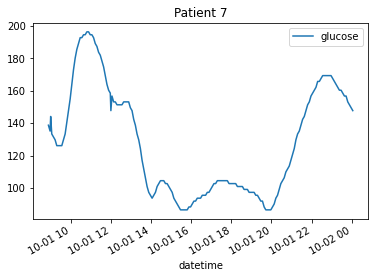

<Figure size 864x432 with 0 Axes>

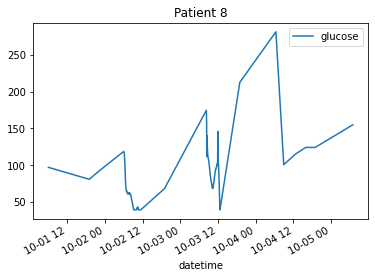

In [ ]:
for i in range(9):
  plt.figure(figsize=(12, 6))
  patientsc[i].set_index('datetime').plot()
  plt.title(f'Patient {i}')

In [ ]:
dfc['time'] = dfc['datetime'].dt.strftime('%r')
dfc['time'] = dfc['date']
conditions = [
    (dfc['glucose'] <= 70) & (dfc['glucose'] > 54),
    (dfc['glucose'] <= 54) & (dfc['glucose'] > 40),
    (dfc['glucose'] <= 40),
    (dfc['time'] > '00:00:00 AM') & (dfc['time'] < '00:06:00 AM')]


choices = ['mild', 'moderate', 'severe', 'nocturnal']
dfc['hypoglycemia'] = np.select(conditions, choices, default='correct')

In [ ]:
pd.to_datetime(dfc['time'], format='%H:%M:%S')

ValueError: ignored

In [ ]:
dfc[dfc['time'] > '00:00:00 AM' & dfc['time'] < '06:00:00 AM']

TypeError: ignored

In [ ]:
dfc[dfc['hypoglycemia'] == 'nocturnal']

,glucose,id,datetime,hypoglycemia,time


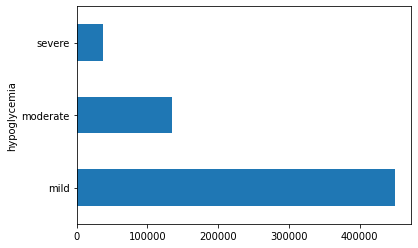

In [ ]:
hgc = dfc[dfc['glucose'] < 70]
hgc.groupby(hgc['hypoglycemia']).count()["glucose"].plot(kind='barh')

In [ ]:

dfc[dfc['datetime'].dt.strftime('%r') < '00:00:00 AM']

0           False
1           False
2           False
3           False
4           False
            ...  
16775309    False
16775310    False
16775311    False
16775312    False
16775313    False
Name: datetime, Length: 16775314, dtype: bool